## EDA


In [1]:
#Importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#loading dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
test_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [5]:
## overview of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# unique value in all columns
print(train_data['Gender'].unique())
print(train_data['Married'].unique())
print(train_data['Dependents'].unique())
print(train_data['Education'].unique())
print(train_data['Self_Employed'].unique())
print(train_data['Credit_History'].unique())
print(train_data['Property_Area'].unique())
print(train_data['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[ 1.  0. nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [7]:
# Convert to 'category' dtype
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Status']
train_data[cat_cols] = train_data[cat_cols].astype('category')

# Convert Credit_History to nullable integer type
train_data['Credit_History'] = train_data['Credit_History'].astype('Int64')


In [8]:
# Convert Credit_History to nullable integer type
train_data['CoapplicantIncome'] = train_data['CoapplicantIncome'].astype('int64')

In [9]:
# Convert Credit_History to nullable integer type
train_data['LoanAmount'] = train_data['LoanAmount'].astype('Int64')

# Convert Credit_History to nullable integer type
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].astype('Int64')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    int64   
 8   LoanAmount         592 non-null    Int64   
 9   Loan_Amount_Term   600 non-null    Int64   
 10  Credit_History     564 non-null    Int64   
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: Int64(3), category(7), int64(2), object(1)
memory usage: 35.8+ KB


In [11]:
print(train_data.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [12]:
# Count and percentage of missing values
missing_data = train_data.isnull().sum().sort_values(ascending=False)
missing_percent = (train_data.isnull().mean() * 100).sort_values(ascending=False)

# Combine into one table
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])


                  Missing Count  Missing %
Credit_History               50   8.143322
Self_Employed                32   5.211726
LoanAmount                   22   3.583062
Dependents                   15   2.442997
Loan_Amount_Term             14   2.280130
Gender                       13   2.117264
Married                       3   0.488599


In [13]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])


In [14]:
print(train_data.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    int64   
 8   LoanAmount         614 non-null    Int64   
 9   Loan_Amount_Term   614 non-null    Int64   
 10  Credit_History     614 non-null    Int64   
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: Int64(3), category(7), int64(2), object(1)
memory usage: 35.8+ KB


In [16]:
## checking duplicate values of train dataset
train_data.duplicated().sum()

np.int64(0)

# test data

In [17]:
## overview of test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [18]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    test_data[col] = test_data[col].astype('category')

# Convert LoanAmount, Loan_Amount_Term, Credit_History to nullable integer if needed
test_data['LoanAmount'] = test_data['LoanAmount'].astype('Int64')
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].astype('Int64')
test_data['Credit_History'] = test_data['Credit_History'].astype('Int64')


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             356 non-null    category
 2   Married            367 non-null    category
 3   Dependents         357 non-null    category
 4   Education          367 non-null    category
 5   Self_Employed      344 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         362 non-null    Int64   
 9   Loan_Amount_Term   361 non-null    Int64   
 10  Credit_History     338 non-null    Int64   
 11  Property_Area      367 non-null    category
dtypes: Int64(3), category(6), int64(2), object(1)
memory usage: 21.4+ KB


In [20]:
# Count and percentage of missing values
missing_test_data = test_data.isnull().sum().sort_values(ascending=False)
missing_test_percent = (test_data.isnull().mean() * 100).sort_values(ascending=False)

# Combine into one table
missing_test_df = pd.DataFrame({'Missing Count': missing_test_data, 'Missing %': missing_test_percent})
print(missing_test_df[missing_test_df['Missing Count'] > 0])


                  Missing Count  Missing %
Credit_History               29   7.901907
Self_Employed                23   6.267030
Gender                       11   2.997275
Dependents                   10   2.724796
Loan_Amount_Term              6   1.634877
LoanAmount                    5   1.362398


In [21]:
# Fill categorical columns with training data modes
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    test_data[col] = test_data[col].fillna(train_data[col].mode()[0])

# Fill numerical columns with training data stats
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])
test_data['Credit_History'] = test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])


In [22]:
print(test_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         367 non-null    category
 4   Education          367 non-null    category
 5   Self_Employed      367 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         367 non-null    Int64   
 9   Loan_Amount_Term   367 non-null    Int64   
 10  Credit_History     367 non-null    Int64   
 11  Property_Area      367 non-null    category
dtypes: Int64(3), category(6), int64(2), object(1)
memory usage: 21.4+ KB


In [24]:
## checking duplicate values of train dataset
test_data.duplicated().sum()

np.int64(0)

# data processs

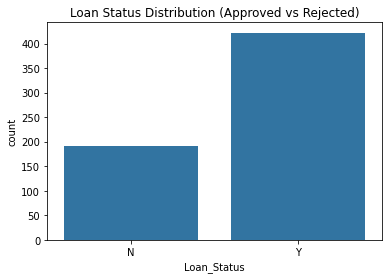

In [25]:
sns.countplot(data=train_data, x='Loan_Status')
plt.title('Loan Status Distribution (Approved vs Rejected)')
plt.show()

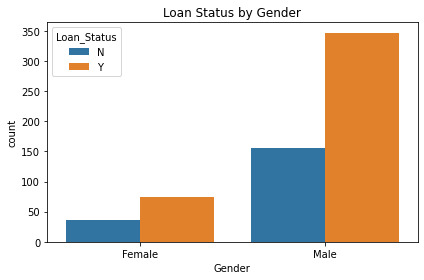

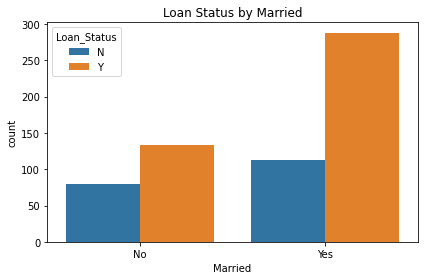

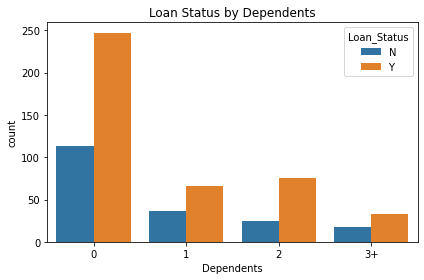

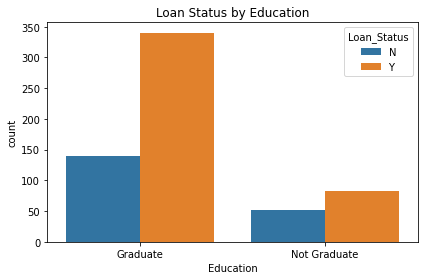

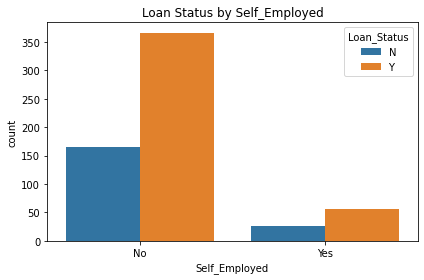

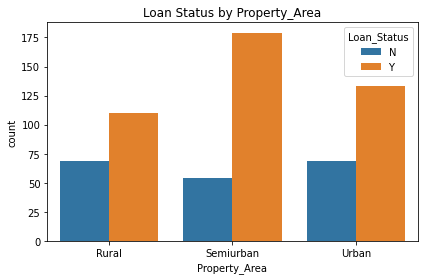

In [26]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train_data, x=col, hue='Loan_Status')
    plt.title(f'Loan Status by {col}')
    plt.tight_layout()
    plt.show()


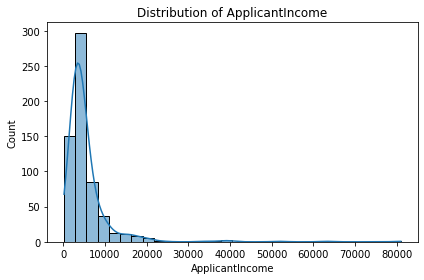

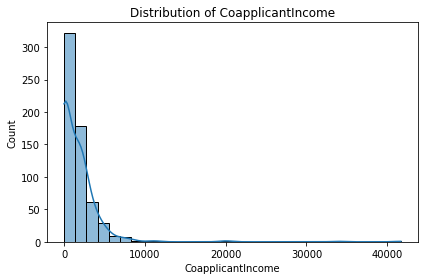

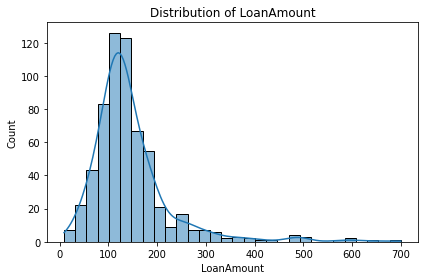

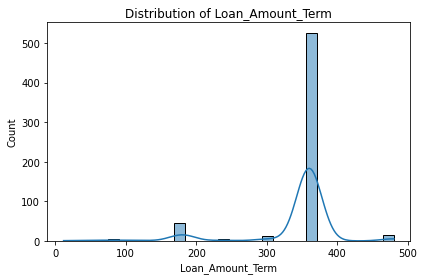

In [27]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


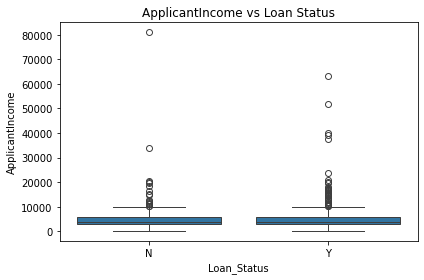

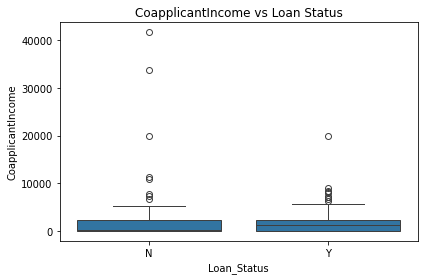

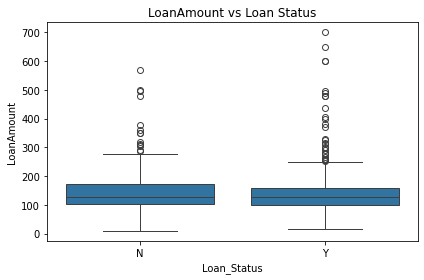

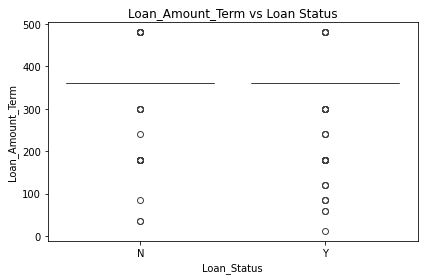

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Loan_Status', y=col, data=train_data)
    plt.title(f'{col} vs Loan Status')
    plt.tight_layout()
    plt.show()


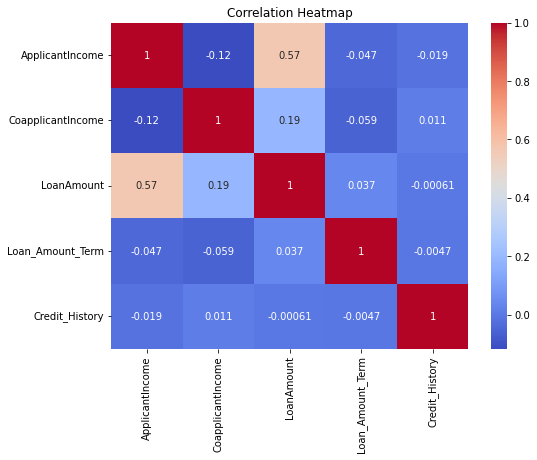

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data[numerical_cols + ['Credit_History']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


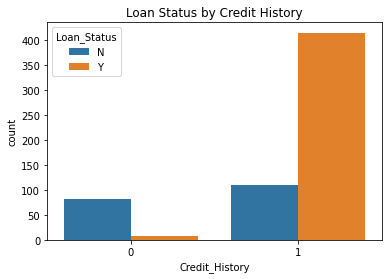

In [30]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.title('Loan Status by Credit History')
plt.show()


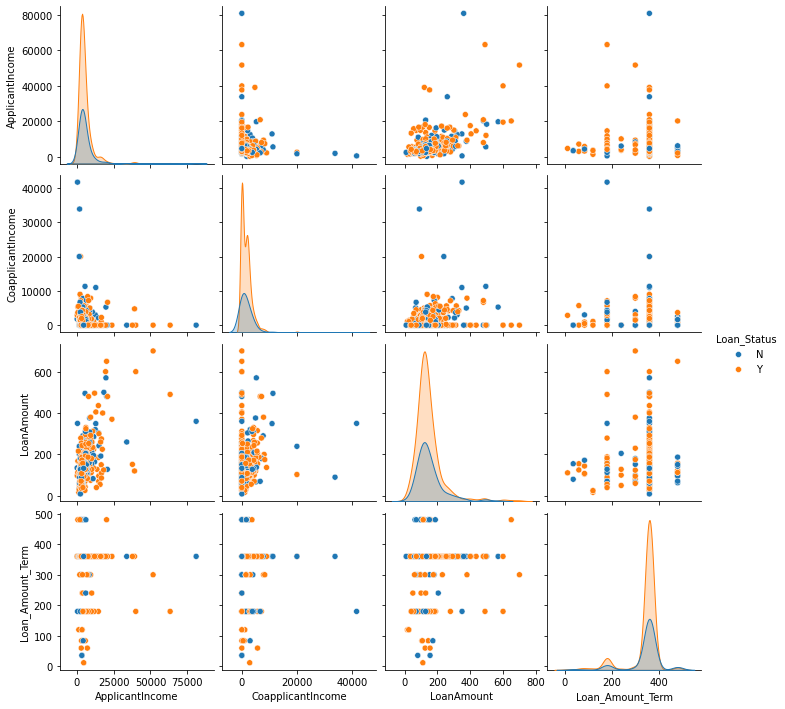

In [31]:
sns.pairplot(train_data, hue='Loan_Status', vars=numerical_cols)
plt.show()


# model building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, precision_score, recall_score, f1_score
)

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# to Compute class weights manually
from sklearn.utils.class_weight import compute_class_weight


In [33]:
# Defining Features and Target
# Drop 'Loan_ID' and set target as 'Loan_Status'
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)

In [34]:
# One-Hot Encode Categorical Features
# Converting categorical columns into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
test_data_encoded = pd.get_dummies(test_data.drop(columns=['Loan_ID']), drop_first=True)

# Align train and test feature sets to have the same columns
X, test_data_encoded = X.align(test_data_encoded, join='left', axis=1, fill_value=0)

In [35]:
# Splitting training data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and training Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Evaluation
y_pred = rf_model.predict(X_val)
y_prob = rf_model.predict_proba(X_val)[:, 1]  # For ROC AUC score

# Accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Classification Report (includes precision, recall, F1)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Additional Metrics
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

Accuracy: 0.7804878048780488

Confusion Matrix:
 [[18 25]
 [ 2 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Precision: 0.7572815533980582
Recall: 0.975
F1 Score: 0.8524590163934426
ROC AUC Score: 0.7710755813953488


### Random Forest with GridSearchCV

In [38]:
from sklearn.model_selection import StratifiedKFold


In [39]:
# Random Forest with GridSearchCV
# -------------------------------
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# -------------------------------
# Evaluation
# -------------------------------
y_pred = best_rf.predict(X_val)
y_prob = best_rf.predict_proba(X_val)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7804878048780488

Confusion Matrix:
 [[18 25]
 [ 2 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Precision: 0.7572815533980582
Recall: 0.975
F1 Score: 0.8524590163934426
ROC AUC Score: 0.754796511627907


###  threshold-tuned Random Forest

In [40]:
from sklearn.metrics import precision_recall_curve, f1_score

# Assuming you already have predicted probabilities
# Replace `model` and `X_val` with your trained model and validation features
y_prob = best_rf.predict_proba(X_val)[:, 1]  # Probabilities for class 1

# Calculate precision-recall at various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Find the best threshold for highest F1
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score at that Threshold: {best_f1:.4f}")

# Now use the best threshold to classify
y_pred_threshold = (y_prob >= best_threshold).astype(int)

# Evaluate
print("New Confusion Matrix:\n", confusion_matrix(y_val, y_pred_threshold))
print("New F1 Score:", f1_score(y_val, y_pred_threshold))
print("New Precision:", precision_score(y_val, y_pred_threshold))
print("New Recall:", recall_score(y_val, y_pred_threshold))
print("New ROC AUC:", roc_auc_score(y_val, y_prob))


Best Threshold: 0.42
Best F1 Score at that Threshold: 0.8541
New Confusion Matrix:
 [[17 26]
 [ 1 79]]
New F1 Score: 0.8540540540540541
New Precision: 0.7523809523809524
New Recall: 0.9875
New ROC AUC: 0.754796511627907


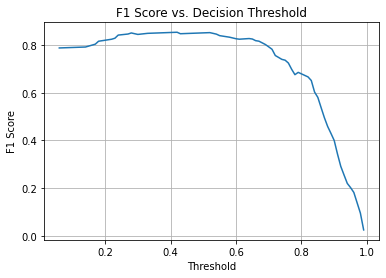

In [41]:
# Plot
plt.plot(thresholds, f1_scores[:-1])
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Decision Threshold')
plt.grid(True)
plt.show()

In [42]:
# Print features
print("Features (X):")
print(X.head())  # Use X.columns to see just the names

# Print target
print("\nTarget (y):")
print(y.head())

Features (X):
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         128               360   
1             4583               1508         128               360   
2             3000                  0          66               360   
3             2583               2358         120               360   
4             6000                  0         141               360   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0               1         True        False         False         False   
1               1         True         True          True         False   
2               1         True         True         False         False   
3               1         True         True         False         False   
4               1         True        False         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0          False                   False     

In [45]:
# Save the threshold separately if you're using a tuned value like 0.42
import joblib
best_threshold = 0.42
joblib.dump(best_threshold, 'best_threshold.pkl')
print("best_threshold saved!!!")

best_threshold saved!!!


In [46]:
import pickle
# after training your RandomForestClassifier model (called rf_model)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)


In [47]:
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [48]:
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
